In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# <font color = 'gold'> First Look </font>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


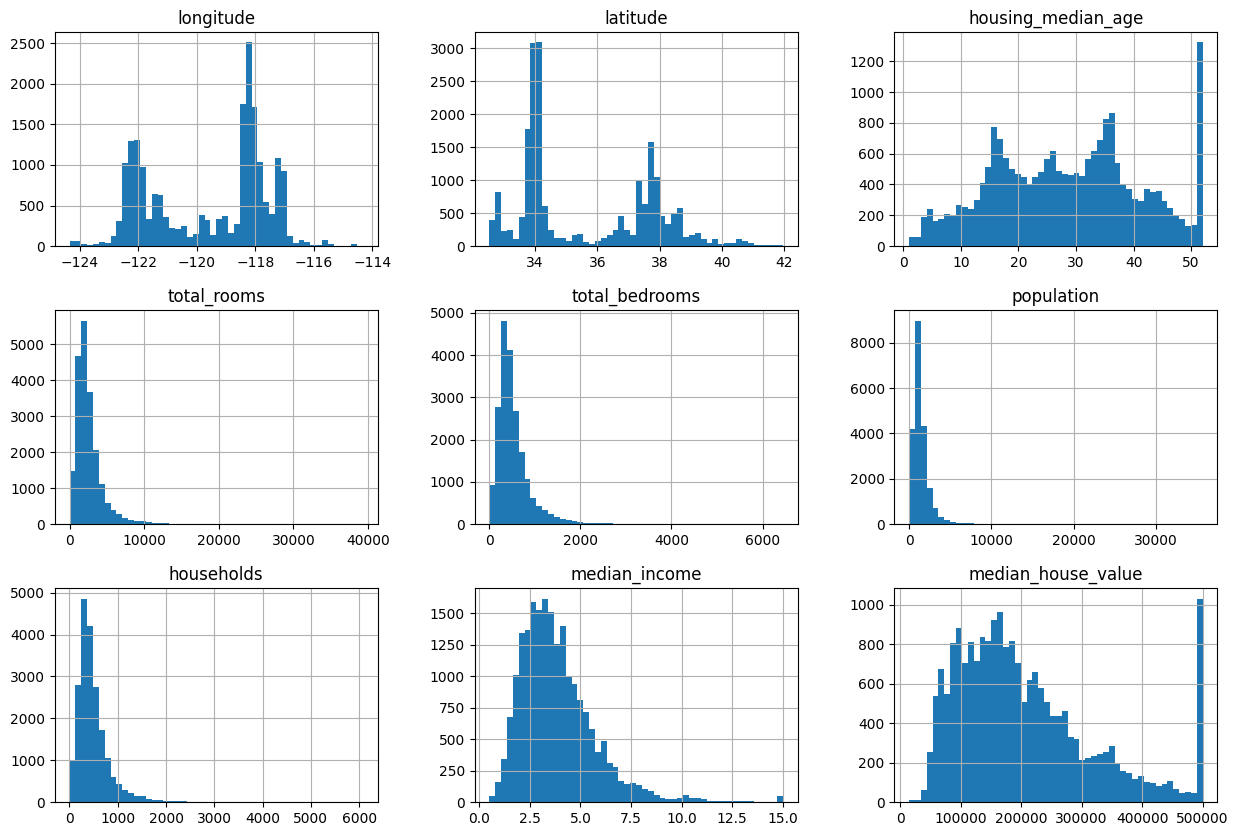

In [5]:
df.hist(figsize = (15, 10), bins = 50)
plt.show()

In [6]:
df.corr(numeric_only=True)['median_house_value'].sort_values(ascending=True)

latitude             -0.144160
longitude            -0.045967
population           -0.024650
total_bedrooms        0.049686
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

# <font color = 'gold'> Separating - train/test datasets </font>

In [7]:
# creating a feature to separate the data
# using median_income because it seems that this is a good feature to predict the price of houses by the correlation analysis
df.median_income.describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

<Axes: xlabel='median_income', ylabel='Count'>

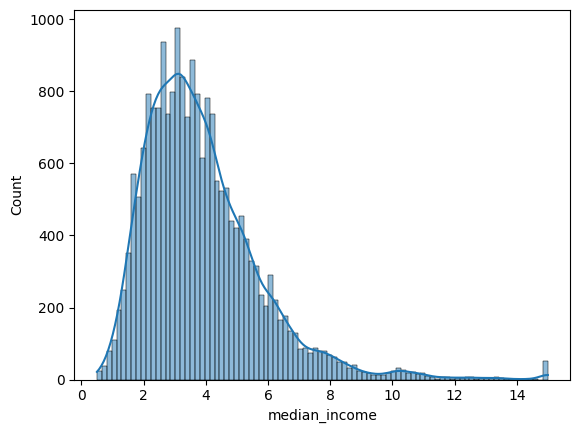

In [8]:
sns.histplot(data = df,
             x = 'median_income',
             kde=True)

In [3]:
bins = [0., 1.5, 3, 4.5, 6, np.inf]
labels = [1, 2, 3, 4, 5]

df['median_income_cat'] = pd.cut(x = df.median_income,
       bins = bins,
       labels = labels)


Text(0.5, 1.0, 'Dist. New Feature - median_income_cat')

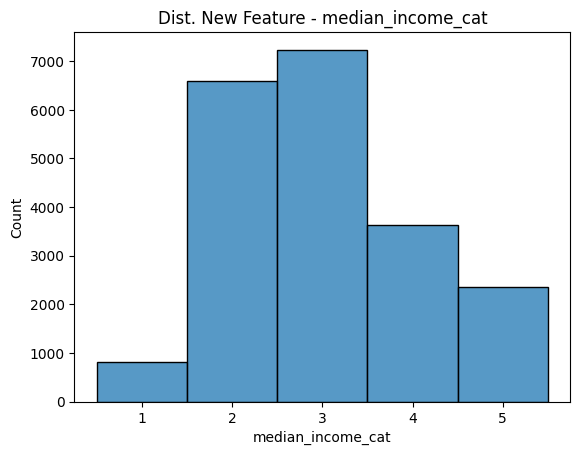

In [4]:
sns.histplot(data = df,
             x = 'median_income_cat')
plt.title('Dist. New Feature - median_income_cat')

In [5]:
# separating the variable using the new feature
from sklearn.model_selection import StratifiedShuffleSplit

shuffle_split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

for train_index, test_index in shuffle_split.split(df, df.median_income_cat):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]

train_set.drop(columns = ['median_income_cat'], inplace = True)
test_set.drop(columns = ['median_income_cat'], inplace = True)

# <font color = 'gold'> Data Exploration </font>

In [12]:
df = train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

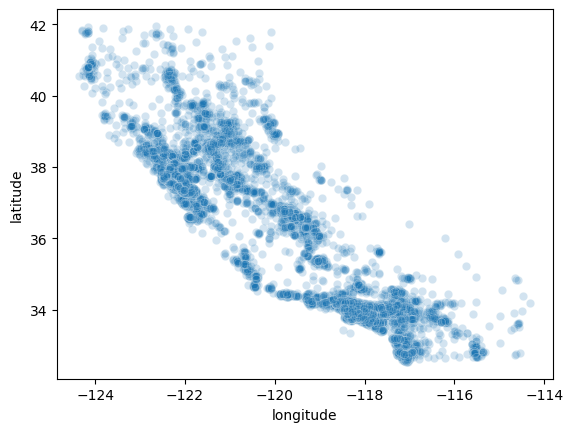

In [13]:
sns.scatterplot(data = df,
                x = 'longitude',
                y = 'latitude',
                alpha = 0.2)

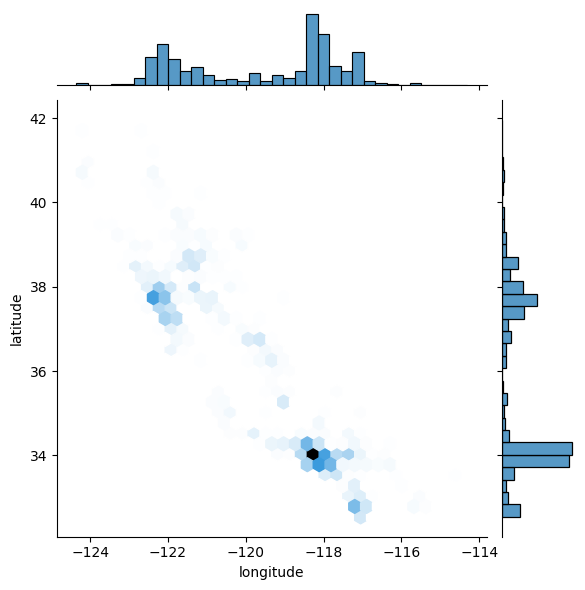

In [14]:
sns.jointplot(data = df,
                x = 'longitude',
                y = 'latitude',
                kind = 'hex')

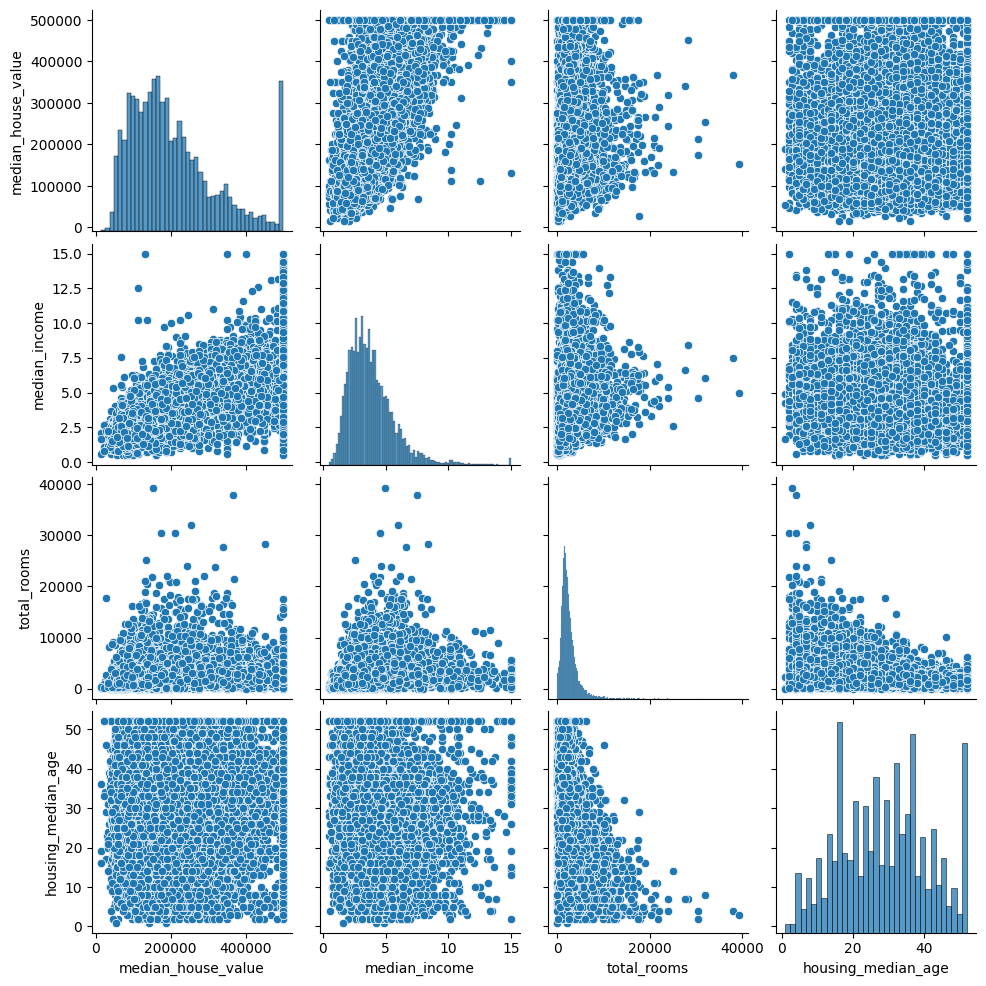

In [15]:
f = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]

sns.pairplot(data = df[f])

In [16]:
df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7277
INLAND        5262
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: count, dtype: int64

In [17]:
df.groupby('ocean_proximity').agg(mean_value =  ('median_house_value', 'mean'),
                                count_houses = ('median_house_value', 'count')).sort_values(by = 'mean_value', ascending = False)

,mean_value,count_houses
ocean_proximity,,
ISLAND,351100.000000,2
NEAR BAY,258740.476448,1847
NEAR OCEAN,248359.495763,2124
<1H OCEAN,240830.511612,7277
INLAND,125320.566515,5262


<Axes: xlabel='longitude', ylabel='latitude'>

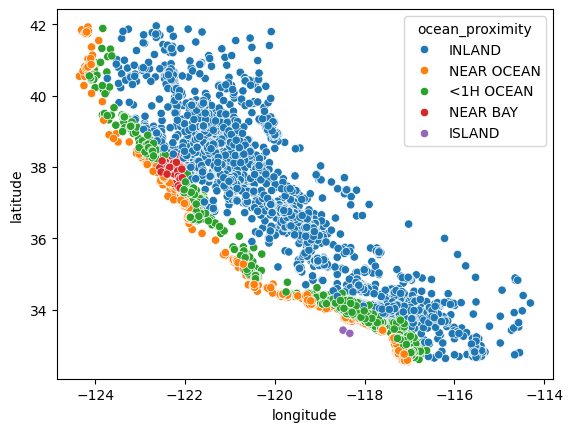

In [18]:
sns.scatterplot(data = df,
                x = 'longitude',
                y = 'latitude',
                hue = 'ocean_proximity')

# <font color = 'gold'> Feature Engineering </font>

In [19]:
# creating new features to feed the model
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"]= df["population"] / df["households"]

In [20]:
df.corr(numeric_only = True)['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

#  <font color = 'gold'> Data Cleaning </font> 

In [21]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')

df_numeric = df.select_dtypes(include = np.number)
df_numeric_tr = imputer.fit_transform(df_numeric)

df_numeric_tr = pd.DataFrame(df_numeric_tr,
                            columns = df_numeric.columns,
                            index = df_numeric.index)
df_numeric_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,6.096552,0.182692,3.167241


In [22]:
from sklearn.preprocessing import OneHotEncoder

df_cat = df[['ocean_proximity']].copy()
one_hot = OneHotEncoder(sparse_output = False)
df_cat = one_hot.fit_transform(df_cat)

df_cat_tr = pd.DataFrame(data = df_cat,
             columns = one_hot.categories_,
             index = df.index)

In [23]:
df_prepared_manual = pd.concat([df_numeric_tr, df_cat_tr], axis=1)

In [24]:
df_prepared_manual

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,"(<1H OCEAN,)","(INLAND,)","(ISLAND,)","(NEAR BAY,)","(NEAR OCEAN,)"
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,5.485836,0.205784,3.168555,0.0,1.0,0.0,0.0,0.0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,6.927083,0.160714,2.623698,0.0,0.0,0.0,0.0,1.0
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,5.393333,0.191595,2.223333,0.0,1.0,0.0,0.0,0.0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,3.886128,0.276505,1.859213,0.0,0.0,0.0,0.0,1.0
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,6.096552,0.182692,3.167241,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,6.658342,0.184696,2.023976,1.0,0.0,0.0,0.0,0.0
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,5.571932,0.179977,3.363188,0.0,1.0,0.0,0.0,0.0
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,4.110465,0.234795,2.662791,1.0,0.0,0.0,0.0,0.0
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,6.297405,0.183835,2.411178,1.0,0.0,0.0,0.0,0.0


# <font color = 'gold'> Preparing Data </font>

In [6]:
df_train = train_set.drop(columns = 'median_house_value')
df_labels = train_set['median_house_value'].copy()

In [7]:
# Creating new features to implement into the model
from sklearn.base import BaseEstimator, TransformerMixin

col_names = 'total_rooms,total_bedrooms,population,households'.split(',')
rooms_ix, bedrooms_ix, population_ix, households_ix = [df_train.columns.get_loc(c) for c in col_names]


class CombiningAttributes(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household  = X[:, population_ix] / X[:, households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

numeric_features = list(df_train.select_dtypes(include = [np.number]).columns)
cat_features = ['ocean_proximity']



numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('adding_new_features', CombiningAttributes(add_bedrooms_per_room=True)),
    ('std_scaler', StandardScaler())
])


full_pipeline = ColumnTransformer([
    ('num', numeric_pipeline, numeric_features),
    ('cat', OneHotEncoder(sparse_output=False), cat_features)
])



df_prepared = full_pipeline.fit_transform(df_train)

In [10]:
df_prepared.shape

(16512, 16)

# <font color = 'gold'> Selecting and Traning a Model </font>

In [29]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(df_prepared, df_labels)

LinearRegression()

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

housing_predictions = lr.predict(df_prepared)

linear_rmse = np.sqrt(mean_squared_error(df_labels, housing_predictions))
linear_mae = mean_absolute_error(df_labels, housing_predictions)

print('Mean Squared Error: ', linear_rmse)
print('Mean Absolute Error: ', linear_mae)
print('Sdt: ', df_labels.std())
print('Mean: ', df_labels.mean())

Mean Squared Error:  68627.87390018745
Mean Absolute Error:  49438.66860915801
Sdt:  115701.29725026492
Mean:  207005.32237160852


In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score


dtr = DecisionTreeRegressor(random_state=42)
scores = cross_val_score(estimator = dtr,
                         X = df_prepared,
                         y = df_labels,
                         scoring = 'neg_mean_squared_error', # cross val expect a utility function insted of cost function, so we need to put a negative metric
                          cv = 10)

dtr_rmse_scores = np.sqrt(-scores)

In [32]:
def display_scores(x):
    print('Scores: ', x)
    print('Mean: ', x.mean())
    print('Std: ', x.std())

display_scores(dtr_rmse_scores)

Scores:  [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
Mean:  71629.89009727491
Std:  2914.035468468928


In [33]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 100, random_state=42)
rfr.fit(X = df_prepared, y = df_labels)

RandomForestRegressor(random_state=42)

In [34]:
rfr_scores = cross_val_score(estimator = rfr,
                             X = df_prepared,
                             y = df_labels,
                             scoring = 'neg_mean_squared_error',
                             cv = 10)

rfr_rmse_scores = np.sqrt(-rfr_scores)
display_scores(rfr_rmse_scores)

Scores:  [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 50065.1762751
 48664.66818196 54055.90894609]
Mean:  50435.58092066179
Std:  2203.3381412764606


In [35]:
lr_scores = cross_val_score(estimator = lr,
                            X = df_prepared,
                            y = df_labels,
                            scoring = 'neg_mean_squared_error', 
                            cv = 10)

lr_rmse_scores = np.sqrt(-lr_scores)
display_scores(lr_rmse_scores)

Scores:  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean:  69104.07998247063
Std:  2880.3282098180666


# <font color = 'gold'> Hiperparameter Tuning - Grid Search </font>

In [36]:
from sklearn.model_selection import GridSearchCV


parameters_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

rfr_v2 = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator = rfr_v2,
                           param_grid = parameters_grid,
                           scoring = 'neg_mean_squared_error',
                           return_train_score = True,
                           cv = 5
                           )
grid_search.fit(X = df_prepared, y = df_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [37]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

# <font color = 'gold'> Applying the model in the Test set </font>

In [47]:
final_model = grid_search.best_estimator_

X_test = test_set.drop(columns=['median_house_value']).copy()
y_test = test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X = X_test_prepared)

final_scores = np.sqrt(mean_squared_error(y_true = y_test, y_pred = final_predictions))

In [49]:
final_scores

47873.26095812988

# <font color = 'gold'> Next Steps </font>


- Add a treatment in feature house_median_age and median_house_value
- Take a look at the categorical feature. When applying OneHotEnconde, one of the categories has only 2 values. This may be a problem
- Add 